# Data Analysis of Google PlayStore Rating

## Introduction

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

## 1.Read Data

**At first, we load the data set from from https://www.kaggle.com/lava18/google-play-store-apps?select=googleplaystore.csv**

In [ ]:
playstore_data = pd.read_csv("data/googleplaystore.csv")

In [ ]:
playstore_data.head()  

**Then, we take a look at the summary statistics. Note that Rating is the only numerical column.**

In [ ]:
playstore_data.describe()

**We take a look at the box plot and histogram.**

In [ ]:
playstore_data.boxplot()

In [ ]:
playstore_data.hist()

In [ ]:
playstore_data.info()

## 2. Clean Data

**We first find the columns with null values.**

In [ ]:
playstore_data.isnull()

In [ ]:
playstore_data.isnull().sum()

### Drop the outliers

**Check how many ratings are more than 5 (Outliers).**

In [ ]:
playstore_data[playstore_data.Rating > 5]

**Drop the outlier column**

In [ ]:
playstore_data.drop([10472],inplace=True)

**Check that the outlier is dropped from the data frame.**

In [ ]:
playstore_data[10470:10475]

**View the box plot and histogram of the new, clean data frame.**

In [ ]:
playstore_data.boxplot()

In [ ]:
playstore_data.hist()

### Remove columns that are 90% empty

**Set the threshold to 10% of the number of rows (10840).**

In [ ]:
threshold = len(playstore_data)* 0.1
threshold

**Drop the column(s) that have less than threshold number of values.** 

In [ ]:
playstore_data.dropna(thresh=threshold, axis=1, inplace=True)

In [ ]:
print(playstore_data.isnull().sum())

**We observe that none of the columns have been dropped.**

### Data Imputation and Manipulation

**Fill the null values with appropriate values using aggregate functions such as mean, median or mode.**

In [ ]:
#Define a function impute_median
def impute_median(series):
    return series.fillna(series.median())

**Fill the null values in Rating column with median.**

In [ ]:
playstore_data.Rating = playstore_data['Rating'].transform(impute_median)

In [ ]:
#count the number of null values in each column
playstore_data.isnull().sum()

**Fill the null values in categorical columns with modes.**

In [ ]:
# modes of categorical values
print(playstore_data['Type'].mode())
print(playstore_data['Current Ver'].mode())
print(playstore_data['Android Ver'].mode())

In [ ]:
# Fill the missing categorical values with mode
playstore_data['Type'].fillna(str(playstore_data['Type'].mode().values[0]), inplace=True)
playstore_data['Current Ver'].fillna(str(playstore_data['Current Ver'].mode().values[0]), inplace=True)
playstore_data['Android Ver'].fillna(str(playstore_data['Android Ver'].mode().values[0]), inplace=True)

In [ ]:
#count the number of null values in each column
playstore_data.isnull().sum()

**Observe that there are no more null values.**

**Then, convert Price, Reviews and Ratings into Numerical Values**

In [ ]:
playstore_data['Price'] = playstore_data['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
playstore_data['Price'] = playstore_data['Price'].apply(lambda x: float(x))
playstore_data['Reviews'] = pd.to_numeric(playstore_data['Reviews'], errors='coerce')

In [ ]:
playstore_data['Installs'] = playstore_data['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
playstore_data['Installs'] = playstore_data['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
playstore_data['Installs'] = playstore_data['Installs'].apply(lambda x: float(x))

In [ ]:
playstore_data.head(10)

**View the summary stats after cleaning**

In [ ]:
playstore_data.describe()

## Data Visualization

**Group the data based on category.**

In [ ]:
grp = playstore_data.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)

In [ ]:
print(x)

In [ ]:
print(y)

In [ ]:
print(z)

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(x,'ro', color='r')
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel('Categories-->')
plt.ylabel('Rating-->')
plt.show()

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--', color='b')
plt.xticks(rotation=90)
plt.title('Category wise Pricing')
plt.xlabel('Categories-->')
plt.ylabel('Prices-->')
plt.show()

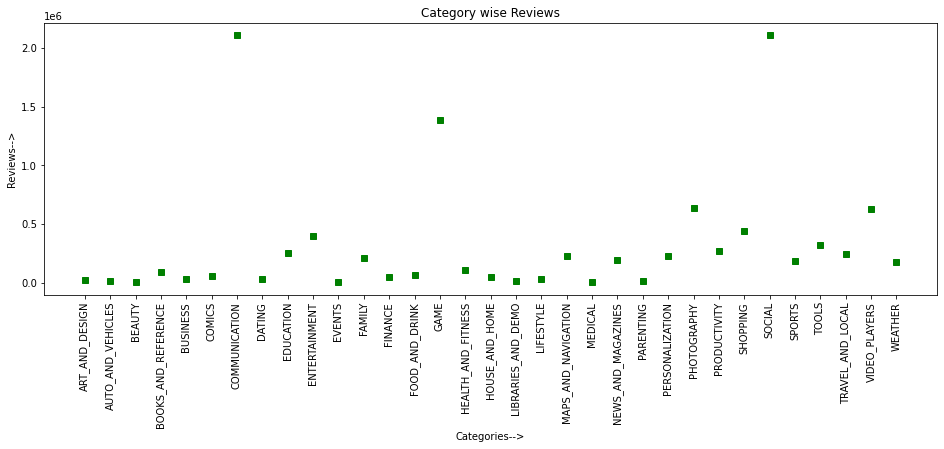

In [61]:
plt.figure(figsize=(16,5))
plt.plot(z,'bs', color='g')
plt.xticks(rotation=90)
plt.title('Category wise Reviews')
plt.xlabel('Categories-->')
plt.ylabel('Reviews-->')
plt.show()